# Project 5

## Lyrics Corpus & Classifier

### Scraping the web for the lyrics

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import re
import pandas as pd

In [2]:
tame_impala = requests.get('https://www.lyrics.com/artist/Tame+Impala/1111074').text

radiohead = requests.get('https://www.lyrics.com/artist/Radiohead/41092').text

arctic_monkeys = requests.get('https://www.lyrics.com/artist/Arctic+Monkeys/744567').text

smiths = requests.get('https://www.lyrics.com/artist/The+Smiths/5466').text

dizzee_rascal = requests.get('https://www.lyrics.com/artist/Dizzee+Rascal/568843').text

frank_ocean = requests.get('https://www.lyrics.com/artist/Frank+Ocean/2295304').text

tupac = requests.get('https://www.lyrics.com/artist/2Pac/50051').text

kendrick_lamar = requests.get('https://www.lyrics.com/artist/Kendrick+Lamar/2412704').text

drake = requests.get('https://www.lyrics.com/artist/Drake/905792').text

rihanna = requests.get('https://www.lyrics.com/artist/Rihanna/704560').text

In [3]:
artists = [tame_impala, radiohead, arctic_monkeys,
           smiths, dizzee_rascal, frank_ocean,
           tupac, kendrick_lamar, drake, rihanna]

In [4]:
artist_url_list=[]

for a in artists:
    
    artist_html = soup(f'{a}', 'html.parser')
    
    for i in artist_html.find_all(attrs={'class':'tal qx'}):
    
        a_tags = i.a
        try:
            artist_url_list.append('http://www.lyrics.com'+ a_tags.get('href'))
        except:
            pass

In [6]:
len(artist_url_list)

1774

In [7]:
def get_lyrics(url):
   
    song = requests.get(url)                   #Step 1: request from the internet
    song_html = soup(song.text, 'html.parser') # Step 2: Extract HTML code as text 
                                               # and then convert it to a Beautiful Soup object!

    song_findall = song_html.find(attrs={'id':'lyric-body-text'})  # Step 3: Found appropriate section of interest (lyrics)
    song_lyrics = song_findall.text # Step 4: Clean up the rest with .text
    song_clean = re.sub('\r\n', ' ', song_lyrics)
    song_clean = re.sub('\s+', ' ', song_lyrics)
    return song_clean

In [9]:
get_lyrics(artist_url_list[200])

"We're bad things to talk about Be constructive There are weapons we can use Be constructive with your blues Even when it's only warnings Even when you talk the war games Oh Why don't you quiet down? (Maybe I want peace and honesty) Why don't you quiet down? (Maybe I want to live in the children's land And you know maybe, maybe I) Why don't you quiet down? (Maybe I'll wander the promised land I want peace and honesty) Why don't you quiet down? (I want to live in the promised land And maybe wander the children's land) Quiet down! (Yeah, and there, there we can free) You don't live in a business world and You never go out and you never stay We won our goals in a liberal world Living in times when I could stand it, babe All over, baby's crying It'll all be, baby, I can see out of here All over the planet's dead All over the planet, so let me out of here All over the, all over the, all over the, all over the (Quiet down) We are the dollars and cents and the pounds and pence And the mark an

In [10]:
lyrics_list = []

for num, url in enumerate(artist_url_list):
    
    try:
        lyrics = get_lyrics(url)
        if num%10==0:
            print(num, url)
        song_title = url.split('/')[-1]
        artist = url.split('/')[-2]
        lyrics_list.append((artist, song_title, lyrics))
        
    except:
        print(f'AttributeError is occuring: {url}')
        pass

0 http://www.lyrics.com/lyric/28988210/Tame+Impala/Elephant+%5BCanyons+Wooly+Mammoth+Extension%5D
10 http://www.lyrics.com/lyric/19631875/Tame+Impala/Bold+Arrow+of+Time
20 http://www.lyrics.com/lyric/35493728/Tame+Impala/Canyons+Sunrise+Reprise
30 http://www.lyrics.com/lyric/27487929/Tame+Impala/Music+to+Walk+Home+By
40 http://www.lyrics.com/lyric/31989243/Tame+Impala/Let+It+Happen
50 http://www.lyrics.com/lyric/31900240/Tame+Impala/Eventually
60 http://www.lyrics.com/lyric/25134225/Radiohead/Staircase
70 http://www.lyrics.com/lyric/16433541/Radiohead/Stop+Whispering+%5BU.S.+Version%5D
80 http://www.lyrics.com/lyric/4229860/Radiohead/Prove+Yourself
90 http://www.lyrics.com/lyric/4089965/Radiohead/Permanent+Daylight
100 http://www.lyrics.com/lyric/4089961/Radiohead/Planet+Telex+%5BLive%5D
110 http://www.lyrics.com/lyric/1587443/Radiohead/My+Iron+Lung
120 http://www.lyrics.com/lyric/1573150/Radiohead/Just+%5BSession%5D
130 http://www.lyrics.com/lyric/1416669/Radiohead/Let+Down
140 http:/

1130 http://www.lyrics.com/lyric/29579437/Mayer+Hawthorne/Crime
1140 http://www.lyrics.com/lyric/31912292/Taylor+Swift/Bad+Blood
1150 http://www.lyrics.com/lyric/31768258/Kendrick+Lamar/For+Free%3F+%5BInterlude%5D
1160 http://www.lyrics.com/lyric/31768259/George+Clinton/Wesley%27s+Theory
1170 http://www.lyrics.com/lyric/33158519/Betty+Wright/Holy+Key
1180 http://www.lyrics.com/lyric/32698373/Kendrick+Lamar/untitled+07+%7C+2014+-+2016
1190 http://www.lyrics.com/lyric/33913852/Rihanna/LOYALTY.
1200 http://www.lyrics.com/lyric/34638613/N.E.R.D/Don%27t+Don%27t+Do+It%21
1210 http://www.lyrics.com/lyric/34837036/Kendrick+Lamar/Hustla%E2%80%99s+Story
1220 http://www.lyrics.com/lyric/33919557/Lil+Wayne/Both+%5BRemix%5D
1230 http://www.lyrics.com/lyric/21929713/Lil+Wayne/Roger+That
1240 http://www.lyrics.com/lyric/18508048/Birdman/Money+to+Blow+%5BStreet+Version%5D
1250 http://www.lyrics.com/lyric/36013890/Drake/Lust+for+Life
1260 http://www.lyrics.com/lyric/17540941/Lil+Wayne/Successful
1270 h

### Making our scraped list into a DataFrame, saving it

In [115]:
df = pd.DataFrame(lyrics_list, columns = ['Artist', 'Title', 'Lyrics'])
df

,Artist,Title,Lyrics
0,Tame+Impala,Elephant+%5BCanyons+Wooly+Mammoth+Extension%5D,Bet he feels like an elephant Shaking his big ...
1,Tame+Impala,Patience,Has it really been that long? Did I count the ...
2,Tame+Impala,Wander,Save your fragile mama's heart And while she w...
3,Tame+Impala,41+Mosquitoes+Flying+in+Formation,Lazy bones and no concern Sees forty one mosqu...
4,Tame+Impala,Desire+Be%2C+Desire+Go,Feel it come I don't know how long it's gonna ...
5,Tame+Impala,Half+Full+Glass+of+Wine,Said you wouldn't be home late tonight I gave ...
6,Tame+Impala,Skeleton+Tiger,Now that all these walls are down Wonder what ...
7,Tame+Impala,Slide+Through+My+Fingers,When I get up I've dreamt too long Everything ...
8,Tame+Impala,Sundown+Syndrome,Please don't get answers from eyes You know th...
9,Tame+Impala,Alter+Ego,"Said the voice from afar ""Don't you know it do..."


In [13]:
df.to_csv('lyrics_df.csv')

In [126]:
lyrics_df = pd.read_csv('lyrics_df.csv')

lyrics_df = lyrics_df.drop(columns='Unnamed: 0')
lyrics_df

,Artist,Title,Lyrics
0,Tame+Impala,Elephant+%5BCanyons+Wooly+Mammoth+Extension%5D,Bet he feels like an elephant Shaking his big ...
1,Tame+Impala,Patience,Has it really been that long? Did I count the ...
2,Tame+Impala,Wander,Save your fragile mama's heart And while she w...
3,Tame+Impala,41+Mosquitoes+Flying+in+Formation,Lazy bones and no concern Sees forty one mosqu...
4,Tame+Impala,Desire+Be%2C+Desire+Go,Feel it come I don't know how long it's gonna ...
5,Tame+Impala,Half+Full+Glass+of+Wine,Said you wouldn't be home late tonight I gave ...
6,Tame+Impala,Skeleton+Tiger,Now that all these walls are down Wonder what ...
7,Tame+Impala,Slide+Through+My+Fingers,When I get up I've dreamt too long Everything ...
8,Tame+Impala,Sundown+Syndrome,Please don't get answers from eyes You know th...
9,Tame+Impala,Alter+Ego,"Said the voice from afar ""Don't you know it do..."


In [127]:
num_artists = len(artists)

In [196]:
num_artists

10

### Making a list of the artists we want, to remove unwanted rows from the DataFrame that were accidentally downloaded from the website

In [247]:
artists_important = lyrics_df['Artist'].value_counts().index[0:num_artists].tolist()

In [129]:
artists_important

['2Pac',
 'Radiohead',
 'Drake',
 'Rihanna',
 'The+Smiths',
 'Arctic+Monkeys',
 'Dizzee+Rascal',
 'Kendrick+Lamar',
 'Frank+Ocean',
 'Tame+Impala']

In [130]:
unwanted_rows = []
for i,j in lyrics_df.iterrows():
    artist = j['Artist']
    
    if artist not in artists_important:
        unwanted_rows.append(i)

In [131]:
len(unwanted_rows)

349

In [132]:
lyrics_df = lyrics_df.drop(unwanted_rows, axis=0)

In [144]:
lyrics_df['Artist'].sort_values().value_counts()

2Pac              282
Radiohead         278
Drake             201
Rihanna           194
The+Smiths        110
Arctic+Monkeys     96
Dizzee+Rascal      82
Kendrick+Lamar     71
Frank+Ocean        55
Tame+Impala        54
Name: Artist, dtype: int64

### Generating a threshold so we don't have imbalance, and a new dataframe with equal amount of songs from each artists

In [85]:
#threshold = lyrics_df['Artist'].value_counts().min()

In [86]:
threshold = 50

In [138]:
lyrics_df_sorted = lyrics_df.sort_values(by='Artist')

In [193]:
lyrics_df_sorted.groupby('Artist')['Lyrics'].count()

Artist
2Pac              282
Arctic+Monkeys     96
Dizzee+Rascal      82
Drake             201
Frank+Ocean        55
Kendrick+Lamar     71
Radiohead         278
Rihanna           194
Tame+Impala        54
The+Smiths        110
Name: Lyrics, dtype: int64

In [194]:
split_points = lyrics_df_sorted.groupby('Artist')['Lyrics'].count().cumsum().values

In [195]:
list(split_points)

[282, 378, 460, 661, 716, 787, 1065, 1259, 1313, 1423]

In [162]:
df1 = lyrics_df_sorted.iloc[:split_points[0]]
df2 = lyrics_df_sorted.iloc[split_points[0]:split_points[1]]
df3 = lyrics_df_sorted.iloc[split_points[1]:split_points[2]]
df4 = lyrics_df_sorted.iloc[split_points[2]:split_points[3]]

In [165]:
first_df = lyrics_df_sorted.iloc[:split_points[0]]

df_list = []

for i in range (0,(len(split_points)-1)):
    
    df_i = lyrics_df_sorted.iloc[split_points[i]:split_points[i+1]]
    
    df_list.append(df_i)

In [168]:
df_list.insert(0, first_df)

In [177]:
df_trimmed = []

for df in df_list:
    
    df = df.head(threshold)
    df_trimmed.append(df)

In [179]:
for df in df_trimmed:
    print(df.shape)

(50, 3)
(50, 3)
(50, 3)
(50, 3)
(50, 3)
(50, 3)
(50, 3)
(50, 3)
(50, 3)
(50, 3)


#### LIST COMPREHENSION:

In [180]:
trimmed_dfs = [df.head(threshold) for df in df_list]

In [198]:
final_df = pd.concat(trimmed_dfs)
final_df

,Artist,Title,Lyrics
755,2Pac,Str8+Ballin%27,I would share the definition of ballin' with y...
929,2Pac,Why+U+Turn+on+Me,"(Ol' switcheroo-ass, bitch made motherfuckers)..."
930,2Pac,World+Wide+Mob+Figgaz,Uh.. world wide mob figgaz (for real) World wi...
931,2Pac,Ballad+of+a+Dead+Soulja,"Yeah, ballad of a dead soldier This is the bal..."
1056,2Pac,Picture+Me+Rollin,Yeah Clear enough for ya? Yea right Why you ni...
1055,2Pac,Lets+Get+It+On,[Heavy D] Yea this is uh Super funk you know w...
1053,2Pac,High+All+the+Time,"I don't need Dom Perignon, I don't need Cris T..."
1052,2Pac,Right+Now,"Uh she got the whole, world, in her jaws When ..."
1051,2Pac,Untouchable+%5BDreathrow+Drunken+Freestyle%5D,You motherfuckers kill me Why yall niggas don'...
1050,2Pac,Tear+Drops+and+Closed+Caskets,Word it's like all we got left Teardrops and c...


### As a function this becomes:

In [199]:
#def balance_artists(df, threshold = 50):
    
    #num_artists = len(artists)

    #artists_important = df['Artist'].value_counts().index[0:num_artists].tolist()

    #unwanted_rows = []
    #for i,j in df.iterrows():
    #    artist = j['Artist']
    #    if artist not in artists_important:
    #        unwanted_rows.append(i)

    #df = df.drop(unwanted_rows, axis=0)
    #df_sorted = df.sort_values(by='Artist')
    #split_points = df_sorted.groupby('Artist')['Lyrics'].count().cumsum().values

    #first_df = df_sorted.iloc[:split_points[0]]
    #df_list = []
    #for i in range (0,(len(split_points)-1)):
    #    df_i = df_sorted.iloc[split_points[i]:split_points[i+1]]
    #    df_list.append(df_i)

    #df_list.insert(0, first_df)

    #trimmed_dfs = [df.head(threshold) for df in df_list]

    #final_df = pd.concat(trimmed_dfs)
    
    #return final_df
    
#balance_artists(lyrics_df)

### Using a SpaCy model to remove stopwords, punctuation, and lemmatise the words we do have to avoid very similar duplicates  

In [200]:
import spacy 

nlp = spacy.load("en_core_web_sm")

In [201]:
model_lyrics = final_df['Lyrics'].values.tolist()

In [444]:
doc = nlp(model_lyrics[1])

In [445]:
doc

(Ol' switcheroo-ass, bitch made motherfuckers) Outlaw nigga, Westside, throw it up Ha haha had love for 'em, but why you turnin on me? Why me? Westside, how you do it boy? I went from, nothin' to somethin' now they all wanna see me fall And the player haters hate to see a thug nigga ball And they say we hate the East coast, but that's funny Got a lot of love for, any niggas gettin' money I made a song about my enemies and niggas tripped It was hip-hop until Tupac fucked Biggie bitch Y'all niggas hypocrites and bitch made Now either love me or hate me but real thug niggas get paid Have me catchin cases all across the nation I went to jail to bail to barely on probation They got a player facin' three strikes, and we might Just blast God bless the child that can get cash But all these niggas turnin' and never learn Got a long line of niggas player hatin' me but gettin' burned Talk a lot of shit but youse a trick in drag Like the Mack make you fall back and stick yo' ass for back pay Why y

In [228]:
lyric_string = []

for lyrics in model_lyrics:
    
    doc = nlp(lyrics)
    sub_string = []
    
    for word in doc:
        
        if not word.is_stop and word.is_alpha:
                        
            sub_string.append(str(word).lower()) #Remember to lemmatise!
              
    lyric_string.append(' '.join(sub_string))

In [229]:
lyric_string[1]

'switcheroo ass bitch motherfuckers outlaw nigga westside throw ha haha love turnin westside boy went wanna fall player haters hate thug nigga ball hate east coast funny got lot love niggas gettin money song enemies niggas tripped hip hop tupac fucked biggie bitch niggas hypocrites bitch love hate real thug niggas paid catchin cases nation went jail bail barely probation got player facin strikes blast god bless child cash niggas turnin learn got long line niggas player hatin gettin burned talk lot shit youse trick drag like mack fall stick yo ass pay wanna turn thought backstab turnin niggas flee t h u g wanna turn thought backstab niggas flee yeah nigga t h u g started innocent ended fifth precinct approach juvenile delinquent decent playin catch kiss diss herbs fuck school skippin drink fifth curb closer drinkin brew need nigga come nigga wear clothes gold hoes gave keys jeep offered home open door picked new direction blink eye time away perfection think die got single visit carry o

In [292]:
def process_text(df):
    
    model_lyrics = df['Lyrics'].values.tolist()
        
    lyric_string = []

    for lyrics in model_lyrics:
    
        doc = nlp(lyrics)
        sub_string = []

        for word in doc:

            if not word.is_stop and word.is_alpha:

                sub_string.append(str(word.lemma_).lower())

        lyric_string.append(' '.join(sub_string))
        
    return lyric_string

In [293]:
lyrics_spacy = process_text(final_df)

In [301]:
lyrics_spacy

['share definition ballin white folk game soldier fuck sunrise hit block little bad mothafucka pocket rock learn throw thang skinny little ass kick niggas laugh til tha mothafucka get blast nigga casket coverin bastard plastic smoke blunt regular buck count tryin million dollar outta quarter ounce gettin lose o fuck hos get screamin survival hey nigga lay low cook yay yo hollar time want pen hittin fence narcs nigga missin inch survive weighin city skinny niggas die tell mama cry kill game young g straight ballin straight ballin straight ballin parole nigga servin pour liquor curb niggas deserve want million get to stay dealin kinda boomin today killin dressin like dirty block clever disguise runnin cop ha gettin high think die end bucket ridin like benz hate stip let music bump drinkin liquor lookin hos fuck die makin money live poor legal slang ounce wish kilo need money major way time fuck beyatch hey gettin pay mothafuckas fallin mothafuckin thug niggas straight ballin straight bal

In [295]:
y = final_df['Artist'].values.tolist()

In [302]:
len(lyrics_spacy) == len(y)

True

### Let's vectorise our lyrics!

In [324]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [304]:
cv = CountVectorizer()

In [306]:
vec = cv.fit_transform(lyrics_spacy)

In [317]:
tf = TfidfTransformer()

In [318]:
vec2 = tf.fit_transform(vec)

In [327]:
X = vec2
y = final_df['Artist'].values.tolist()

In [328]:
m = MultinomialNB()

In [329]:
m.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [330]:
m.score(X, y)

0.974

### Generating a test DataFrame with all the songs that weren't included in the original DF that we can then use to predict the artist who wrote the specified lyrics

In [342]:
def test_df(df, threshold = 50):
    
    num_artists = len(artists)

    artists_important = df['Artist'].value_counts().index[0:num_artists].tolist()

    unwanted_rows = []
    for i,j in df.iterrows():
        artist = j['Artist']
        if artist not in artists_important:
            unwanted_rows.append(i)

    df = df.drop(unwanted_rows, axis=0)
    df_sorted = df.sort_values(by='Artist')
    split_points = df_sorted.groupby('Artist')['Lyrics'].count().cumsum().values

    first_df = df_sorted.iloc[:split_points[0]]
    df_list = []
    for i in range (0,(len(split_points)-1)):
        df_i = df_sorted.iloc[split_points[i]:split_points[i+1]]
        df_list.append(df_i)

    df_list.insert(0, first_df)

    trimmed_dfs = [df[50:] for df in df_list]

    final_df = pd.concat(trimmed_dfs)
    
    return final_df

In [344]:
test_df = test_df(lyrics_df)

In [553]:
test_df.head(3)

,Artist,Title,Lyrics
906,2Pac,Only+4+the+Righteous,Stay showing loving to my hustlers and thugs A...
909,2Pac,Thug+Blues,Love within a storm Love within a storm Love w...
910,2Pac,Wake+Me+When+I%27m+Free,"Please, wake me when I am free I cannot bear a..."


### Processing lyrics of the dataframe, then predicting songwriter

In [515]:
def process_text(df):
    
    model_lyrics = df['Lyrics'].values.tolist()
        
    lyric_string = []

    for lyrics in model_lyrics:
    
        doc = nlp(lyrics)
        sub_string = []

        for word in doc:

            if not word.is_stop and word.is_alpha:

                sub_string.append(str(word.lemma_).lower())

        lyric_string.append(' '.join(sub_string))
        
    return lyric_string

In [516]:
test_spacy = process_text(test_df)

In [525]:
vec_test_spacy = cv.transform(test_spacy)

vec_test_spacy_final = tf.transform(vec_test_spacy)

In [580]:
prediction = m.predict(vec_test_spacy_final)

In [597]:
prediction

array(['2Pac', 'Rihanna', 'Kendrick+Lamar', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', 'Rihanna', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', 'Rihanna',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', 'Rihanna', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac',
       '2Pac', 'Kendrick+Lamar', '2Pac', '2Pac', '2Pac', '2Pac', '2Pac'

### Making a dataframe of the predictions to be compared with actual songwriter

In [573]:
prediction_list = prediction.tolist()

In [575]:
test_list = test_df['Artist'].values.tolist()

In [577]:
zipped = list(zip(test_list, prediction_list))

In [583]:
predictions_df = pd.DataFrame(zipped, columns = ['Artist', 'Prediction'])
predictions_df.head()

,Artist,Prediction
0,2Pac,2Pac
1,2Pac,Rihanna
2,2Pac,Kendrick+Lamar
3,2Pac,2Pac
4,2Pac,2Pac


In [ ]:
# for i,j in df.iterrows:
#     if j['Artist'] == j['Prediction']:
        

### The percentage of correctly predicted songwriters: 53.5%!

In [585]:
boolean = predictions_df['Artist'] == predictions_df['Prediction']

In [587]:
boolean.sum()/len(boolean)

0.5352112676056338

In [588]:
from sklearn.metrics import confusion_matrix

In [590]:
conf = confusion_matrix(predictions_df['Artist'], predictions_df['Prediction'])

In [592]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

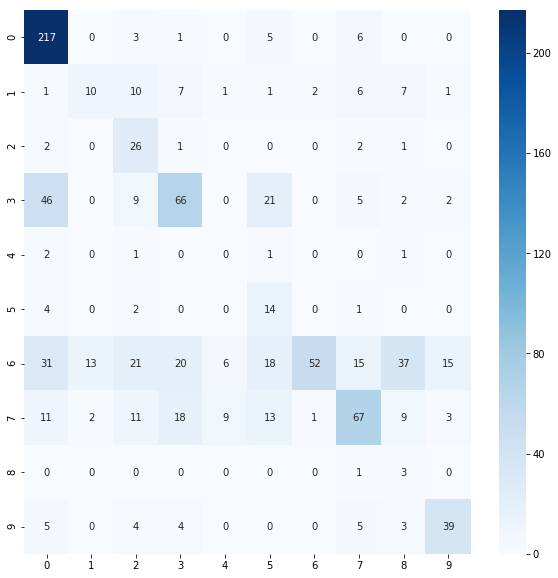

In [596]:
plt.figure(figsize=(10,10))

sns.heatmap(conf, cmap='Blues', annot=True, fmt='g')

### Let's make a random test lyric generator

In [369]:
from random import randint

In [427]:
tame_test_df = test_df.set_index('Artist').loc['Tame+Impala'].reset_index()

In [435]:
random_lyric = tame_test_df['Lyrics'].iloc[randint(0, len(tame_test_df))]

In [446]:
random_lyric

"Please don't get answers from eyes You know that mine can't lie quite as well as yours Just let the spare moment flow Rounding steps as I go through the open doors Please don't deflate from a sigh I'd hold still every time but I start to shake I wander around for days Wondering what I'll say when they want the truth You will never know how hard I try To keep from waning while waiting at the start The depth of every touch is real as you need But words don't do any favors for me You will never know how hard I try To keep from waning while waiting at the start The depth of every touch is real as you need But words don't do any favors for me You will never know how hard I try To keep from waning while waiting at the start The depth of every touch is real as you need But words don't do any favors for me You will never know how hard I try To keep from waning while waiting at the start The depth of every touch is real as you need But words don't do any favors for me You will never know how h

In [447]:
doc = nlp(random_lyric)

In [473]:
test_string = []
sub_string = []

for word in doc:
        
    if not word.is_stop and word.is_alpha:
                        
        sub_string.append(str(word.lemma_).lower()) #Remember to lemmatise!

test_string.append(' '.join(sub_string))

In [486]:
test_string

['answer eye know lie let spare moment flow round step open door deflate sigh hold time start shake wander day wonder want truth know hard try wan wait start depth touch real need word favor know hard try wan wait start depth touch real need word favor know hard try wan wait start depth touch real need word favor know hard try wan wait start depth touch real need word favor know hard try wan wait start depth touch real need word favor']

In [520]:
vec_test = cv.transform(test_string)

In [521]:
vec_test_final = tf.transform(vec_test)

In [522]:
m.predict(vec_test_final)

array(['Tame+Impala'], dtype='<U14')

In [503]:
m.predict_proba(vec_test_final)

array([[0.09136723, 0.09457459, 0.08422584, 0.11877119, 0.06679878,
        0.0860633 , 0.06610662, 0.08897715, 0.22994518, 0.07317012]])

In [498]:
lyrics_df_sorted['Artist'].unique()

array(['2Pac', 'Arctic+Monkeys', 'Dizzee+Rascal', 'Drake', 'Frank+Ocean',
       'Kendrick+Lamar', 'Radiohead', 'Rihanna', 'Tame+Impala',
       'The+Smiths'], dtype=object)

In [ ]:
def lyric_generator(df):    
    
    artists = test_df['Artist'].unique().tolist()
    
    for a in artists:
    
        tame_test_df = test_df.set_index('Artist').loc['Tame+Impala'].reset_index()

        random_lyric = tame_test_df['Lyrics'].iloc[randint(0, len(tame_test_df))]

        random_lyric

        doc = nlp(random_lyric)

        test_string = []
        sub_string = []

        for word in doc:

            if not word.is_stop and word.is_alpha:

                sub_string.append(str(word.lemma_).lower()) #Remember to lemmatise!

        test_string.append(' '.join(sub_string))

        test_string

        vec_test = cv.transform(test_string)

        vec_test_final = tf.transform(vec_test)

        m.predict(vec_test_final)

        m.predict_proba(vec_test_final)

In [507]:
lyrics_df_sorted['Artist'].unique().tolist()

['2Pac',
 'Arctic+Monkeys',
 'Dizzee+Rascal',
 'Drake',
 'Frank+Ocean',
 'Kendrick+Lamar',
 'Radiohead',
 'Rihanna',
 'Tame+Impala',
 'The+Smiths']

In [510]:
test_df['Artist'].unique().tolist()

['2Pac',
 'Arctic+Monkeys',
 'Dizzee+Rascal',
 'Drake',
 'Frank+Ocean',
 'Kendrick+Lamar',
 'Radiohead',
 'Rihanna',
 'Tame+Impala',
 'The+Smiths']